# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [25]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [53]:
import jupyter_black

jupyter_black.load()
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

## Formulas

In [54]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [55]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [56]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    (
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
        if bins
        else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [57]:
def assign_outliers_to_whiskers(df, column):
    """
    Assign outliers to the lower and upper whiskers of the data.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column name for which to assign outliers.

    Returns:
    pd.Series: The modified column with outliers assigned to the lower and upper whiskers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Assign outliers to the lower and upper whiskers
    df[column] = np.where(df[column] < lower_whisker, lower_whisker, df[column])
    df[column] = np.where(df[column] > upper_whisker, upper_whisker, df[column])

    return df[column]

In [58]:
def assign_outliers_to_upper_whisker(df, column, upper_threshold=500):
    """
    Assign outliers to the higher whisker of the data.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column name for which to assign outliers.
    upper_threshold (float): The threshold value to identify upper outliers.

    Returns:
    pd.Series: The modified column with outliers assigned to the higher whisker.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR

    # Assign outliers to the higher whisker
    df[column] = np.where(df[column] >= upper_threshold, upper_whisker, df[column])

    return df[column]

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [60]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [62]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [63]:
def add_counts_to_countplot(ax):
    """
    Adds the actual count on top of each bar in a seaborn countplot.

    Parameters:
    ax (matplotlib.axes.Axes): The axes object of the countplot.
    """
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

## Data Overview

- Observations
- Sanity checks

In [64]:
data = pd.read_csv("INNHotelsGroup.csv")
df = data.copy()

In [65]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [66]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [67]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")

Data has 36275 rows and 19 columns


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [69]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [70]:
df.duplicated().sum()

0

In [71]:
print(df.Booking_ID.nunique())
df = df.drop(["Booking_ID"], axis=1)

36275


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


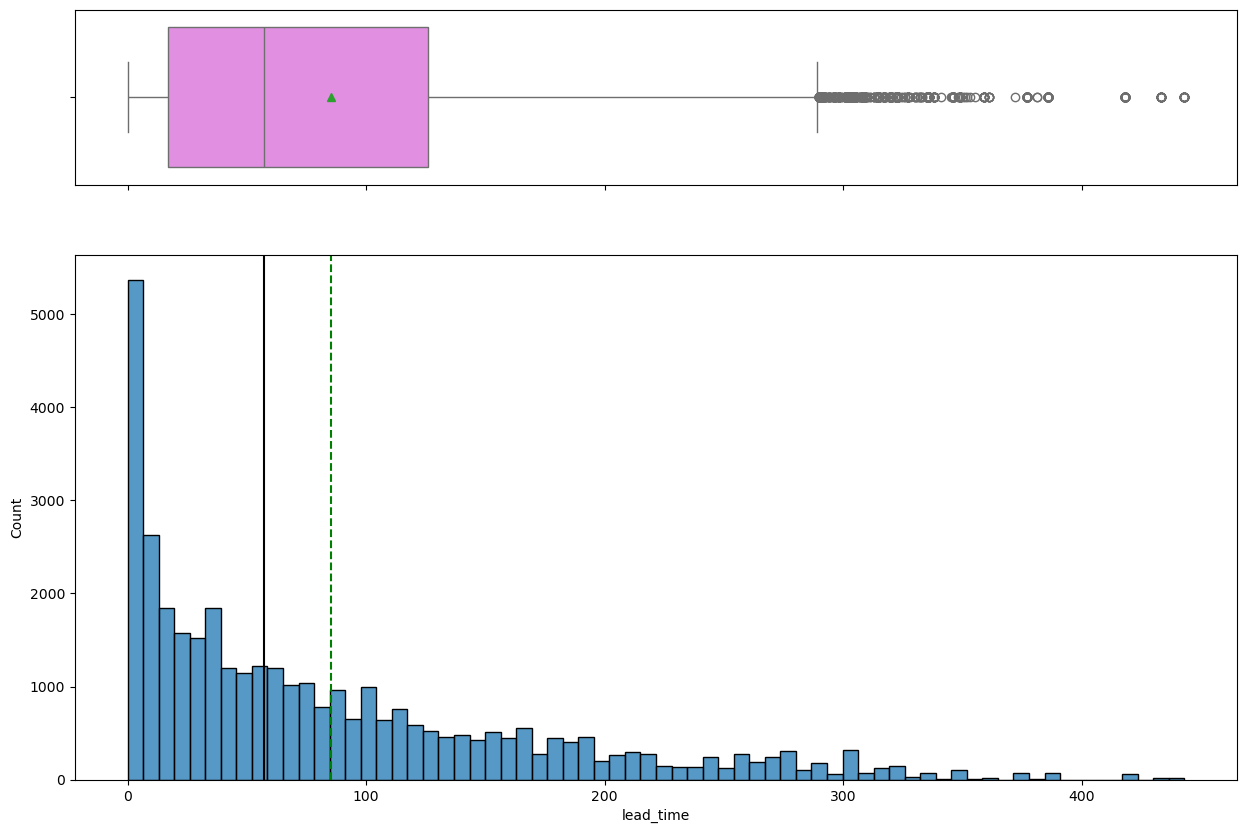

In [73]:
histogram_boxplot(df, "lead_time")

The average lead time of the reservations is 85.23 days, while the minimum is 0 days and the maximum 443. There is a lot of dispersion on this regard

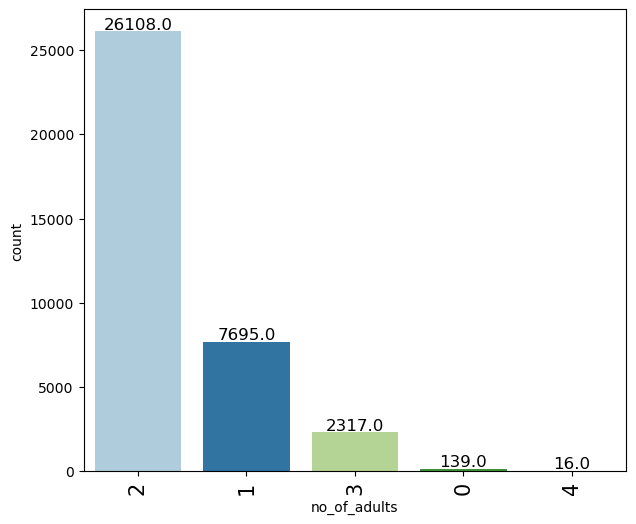

In [74]:
labeled_barplot(df, "no_of_adults")

Majority of reservations are made for 2 people, what can indicate that most of the time the reservations are made for either non-closely related people or couples with no other adults. Surprinsily there are some reservations made for no people. This might need to be clarified

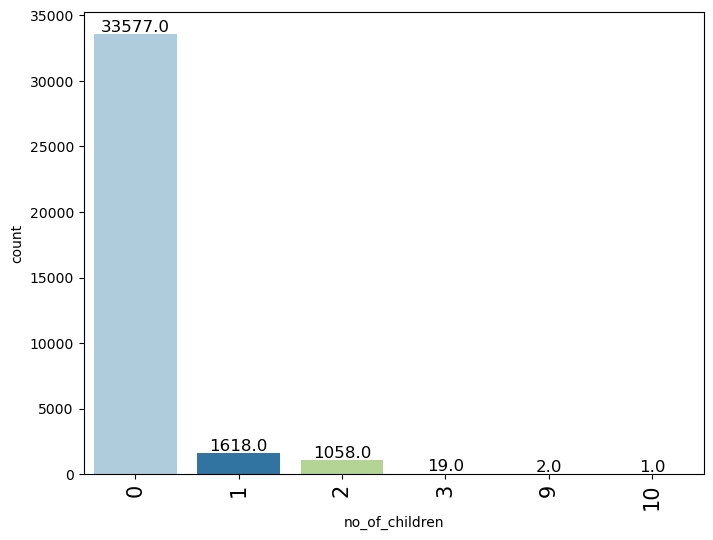

In [75]:
labeled_barplot(df, "no_of_children")

Mayority of the reservations are made for families with no children. The ones that has children generally has 1 or 2 added children in the reservation. Some surprinsing data shows paople with 9 or 10 children. For the sake of the analysis and to avoid possible error on the analsysis these are going to be considered on the highest previous data that is 3 children.

In [76]:
# Assigning values of 9 and 10 to 3 as previously explained
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

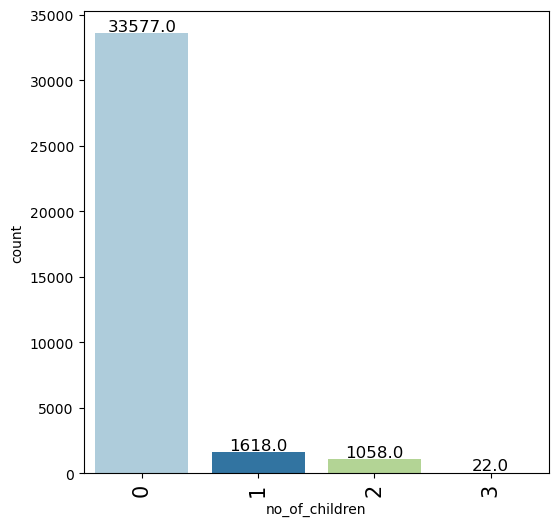

In [77]:
labeled_barplot(df, "no_of_children")

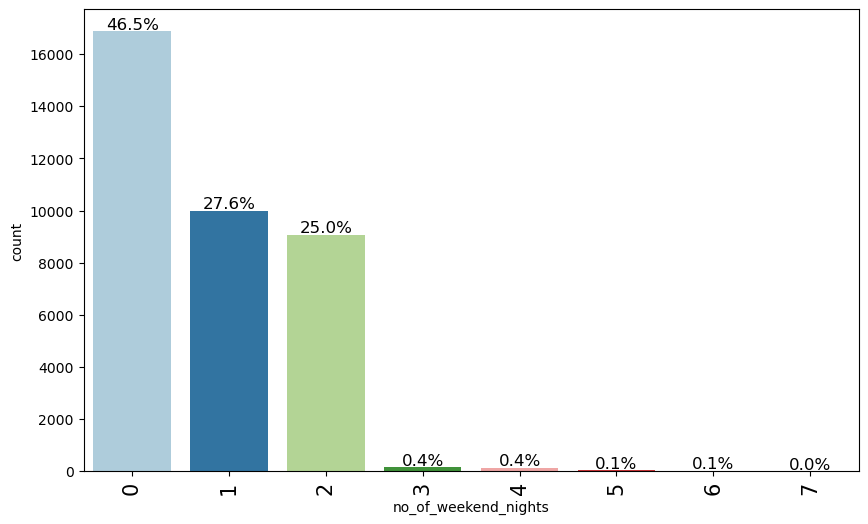

In [78]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

MOst of the reservations are made for week days. The ones that include weekend most of the time is only 1 weekend. Only a small percentage of people stays for more than 1 week + 1 weekend.

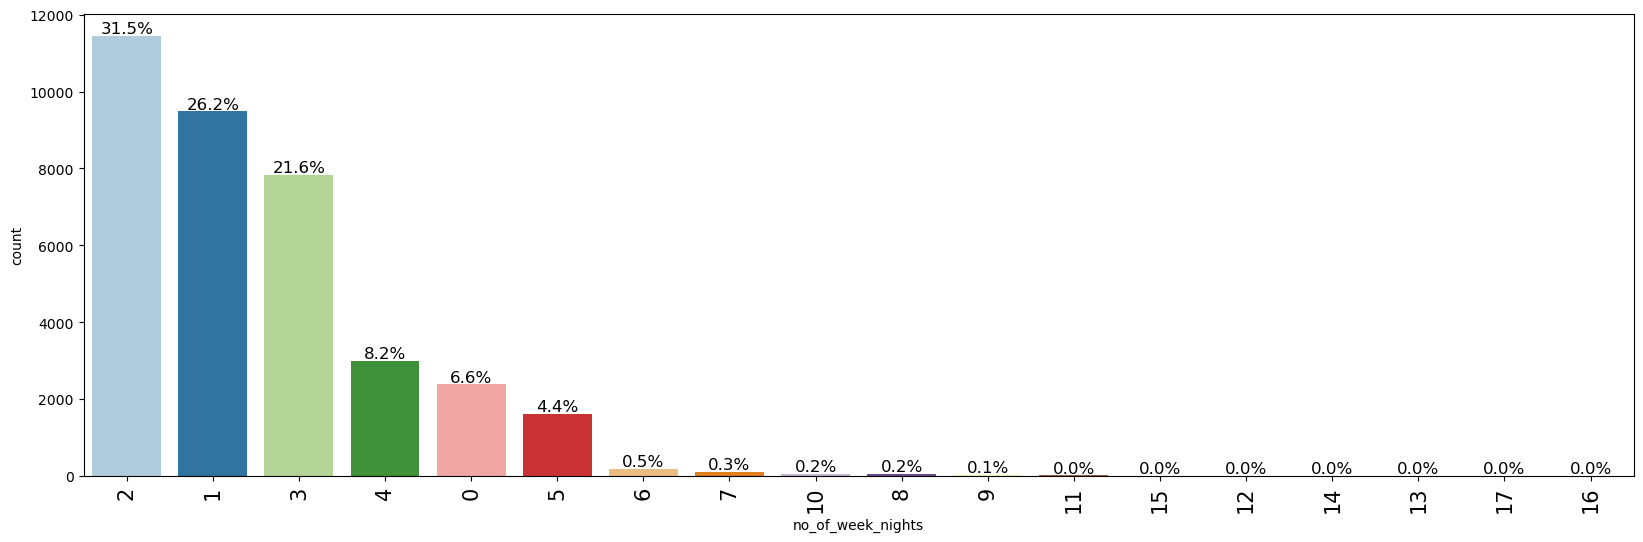

In [79]:
labeled_barplot(df, "no_of_week_nights", perc=True)

As before, the majority of reservations are made for stays during the week, typically lasting only a couple of days (mainly one or two). This might indicate that most people using these reservations are on short trips, such as business trips or stopovers.

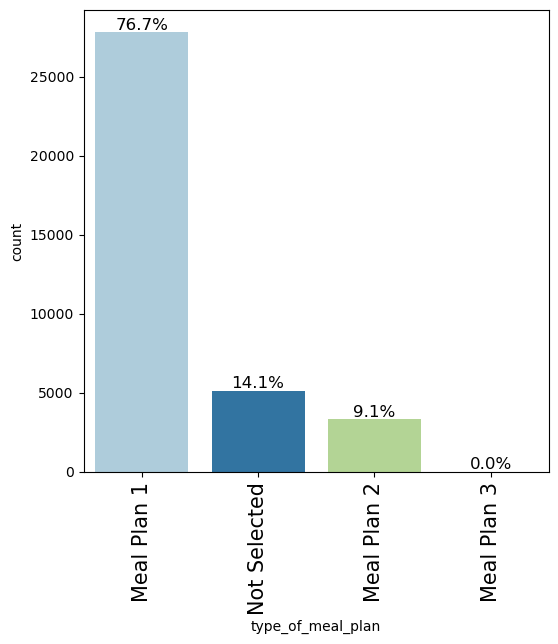

In [80]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

Most of the people tend to choose the meal plan 1 (breakfast) when making a reservation. 

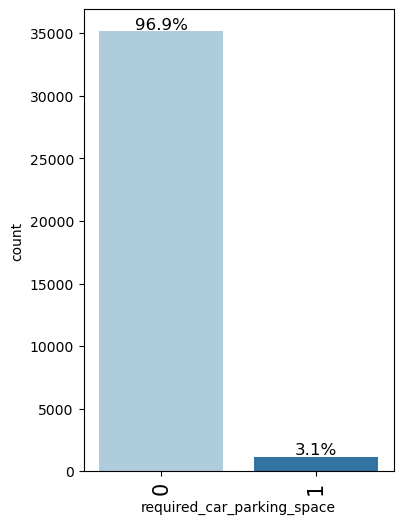

In [81]:
labeled_barplot(df, "required_car_parking_space", perc=True)

Most of the reservation do not require a parking space.

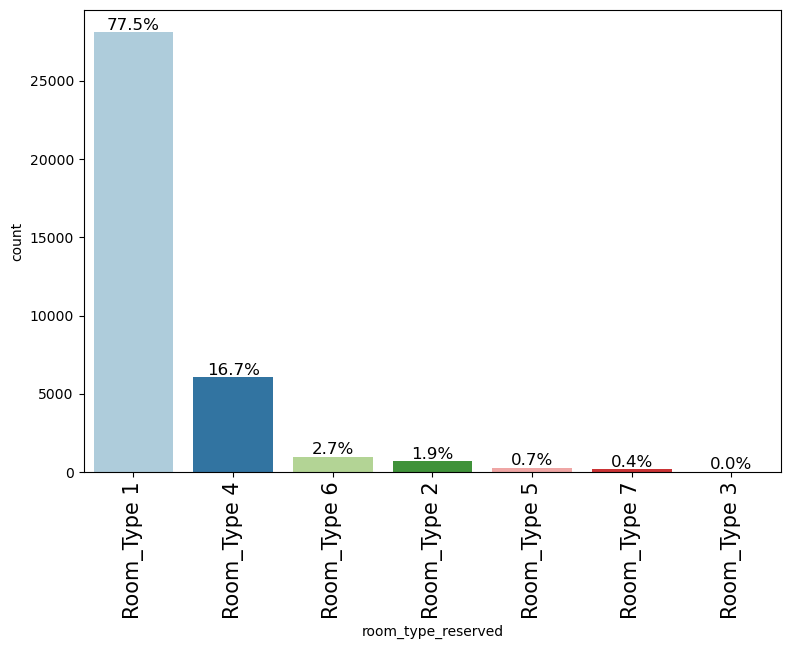

In [82]:
labeled_barplot(df, "room_type_reserved", perc=True)

The most common room reserved is the Type 1. 

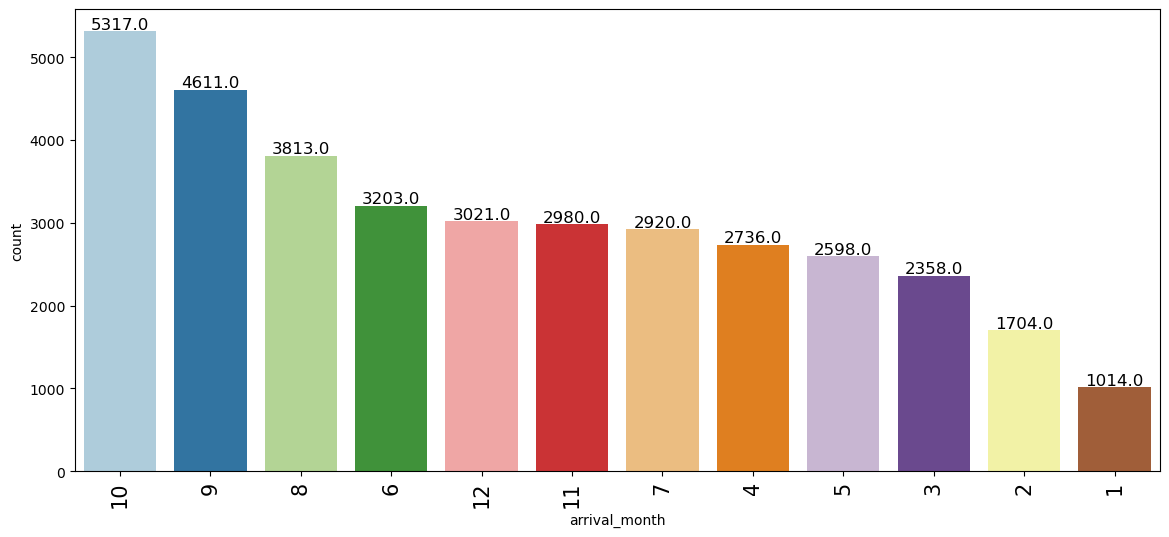

In [83]:
labeled_barplot(df, "arrival_month")

Most of the people arrive on october or september. January is the least reserved month.

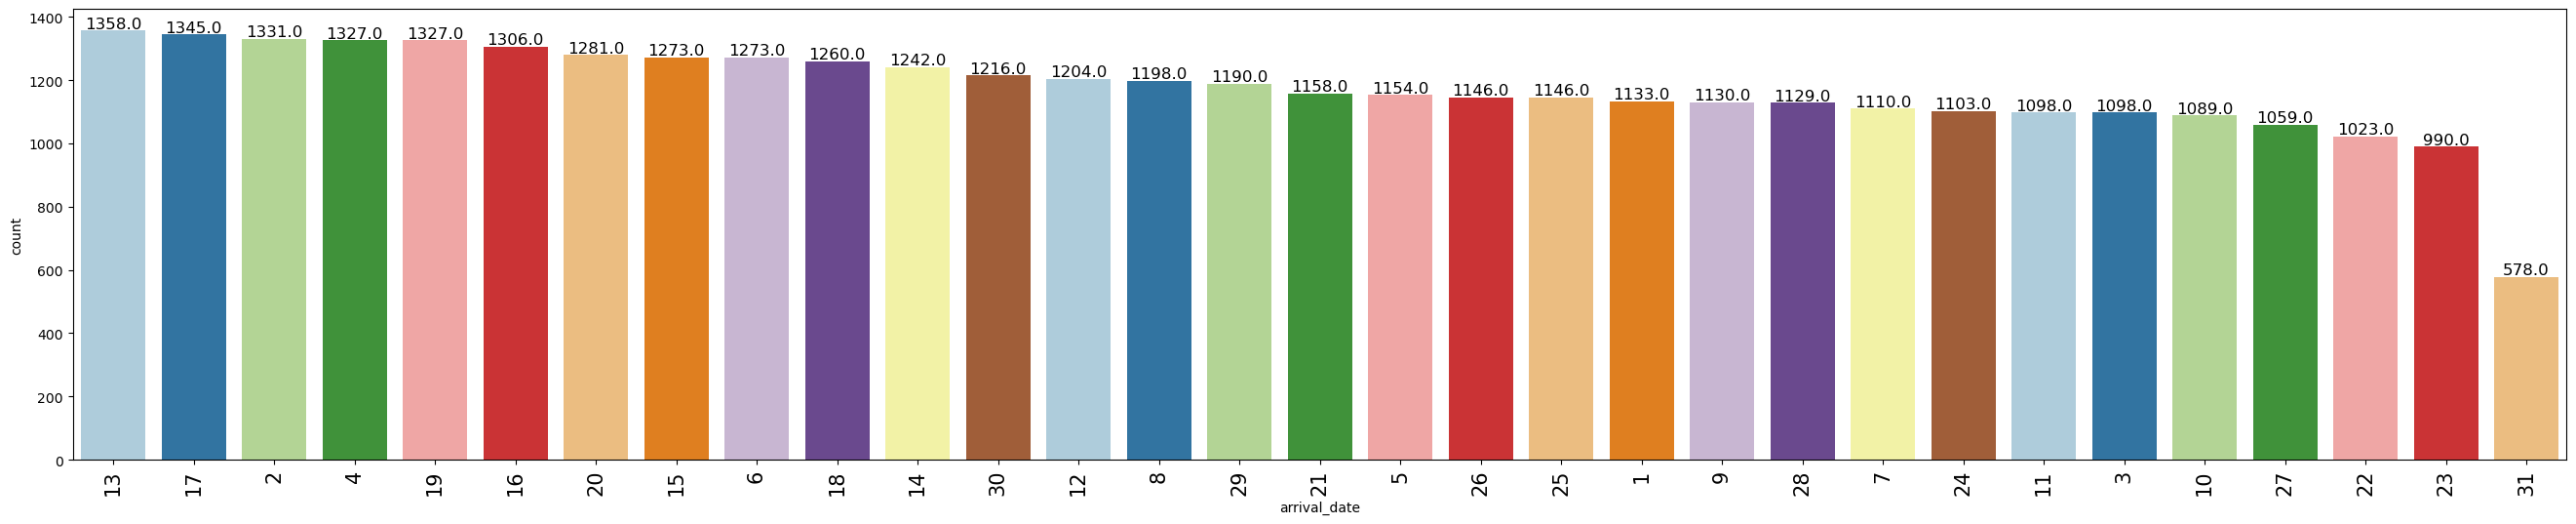

In [84]:
labeled_barplot(df, "arrival_date")

Most of the people arrive on the 13 or 17 of each month, followed by the first days of the month. The least common day is the 31st but this might be due to the reduced number of months that has 31 days. 

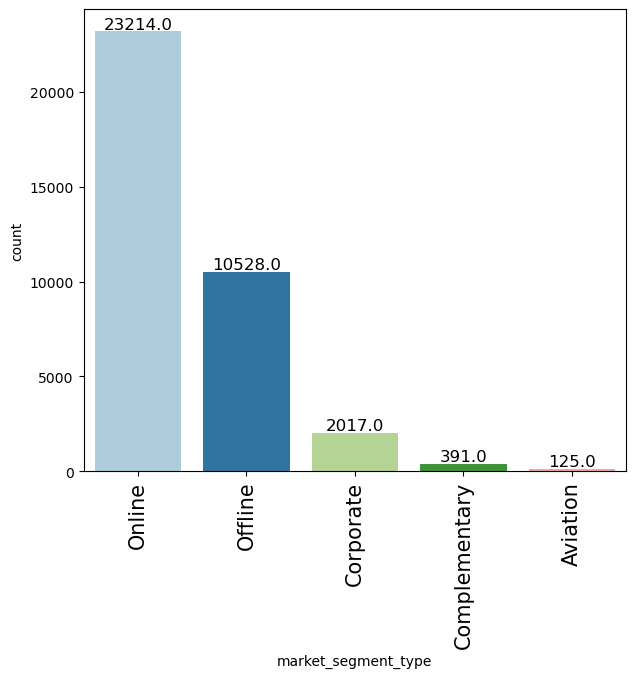

In [85]:
labeled_barplot(df, "market_segment_type")

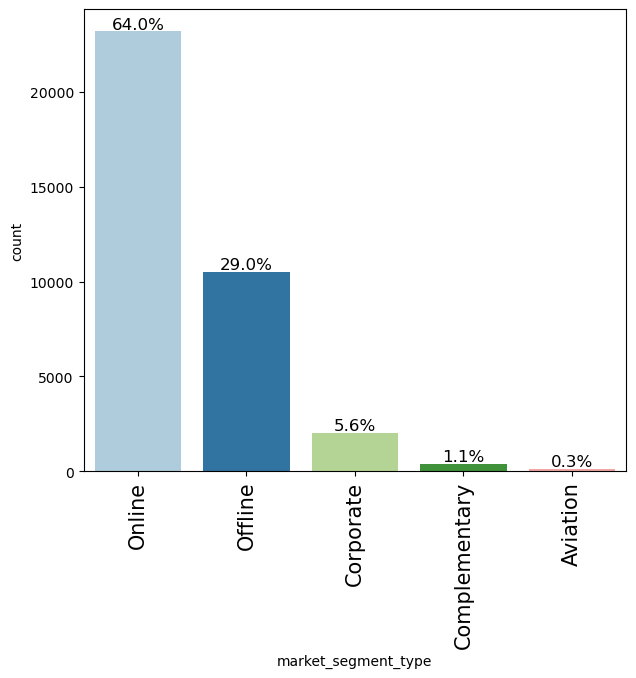

In [86]:
labeled_barplot(df, "market_segment_type", perc=True)

Most of the reservations are made online, followed by the offline ones. The least common reservation is the one linked with Aviation.

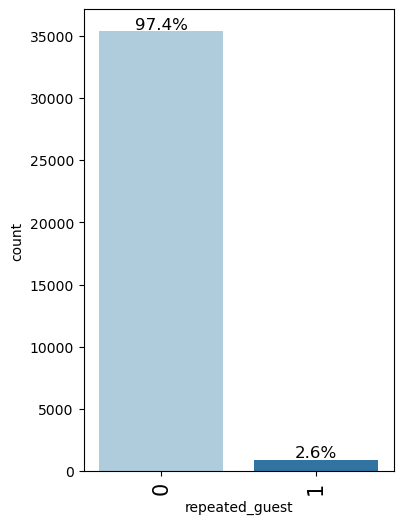

In [87]:
labeled_barplot(df, "repeated_guest", perc=True)

Most of the reservations are made by new clients (not repeated)

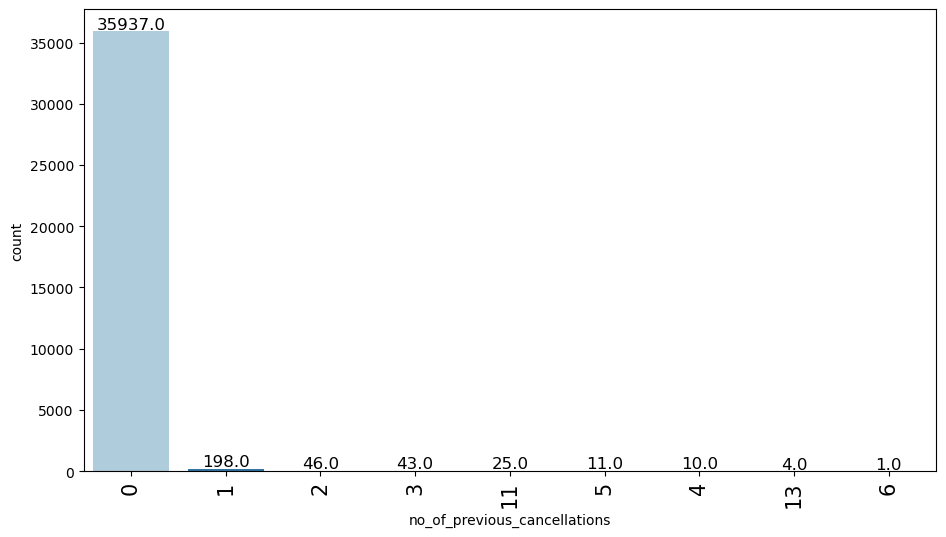

In [88]:
labeled_barplot(df, "no_of_previous_cancellations")

The majority of clients have no history of previous cancellations. When they do show previous cancellations, it is most often only one. Surprisingly, there are some clients with at least 13 previous cancellations.

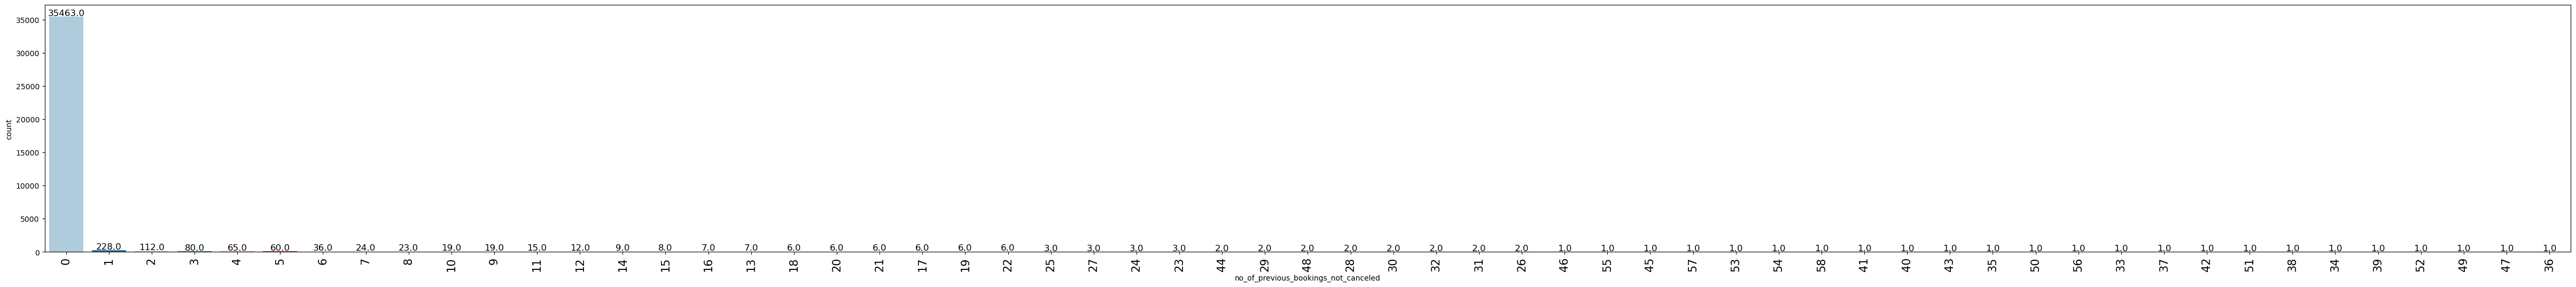

In [89]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled");

There is a high amount of clients that has no history of previous cancellations, but some of them have history of not cancelling for multiple stays. (One clinet shows a history of 58 stays with no cancellations)

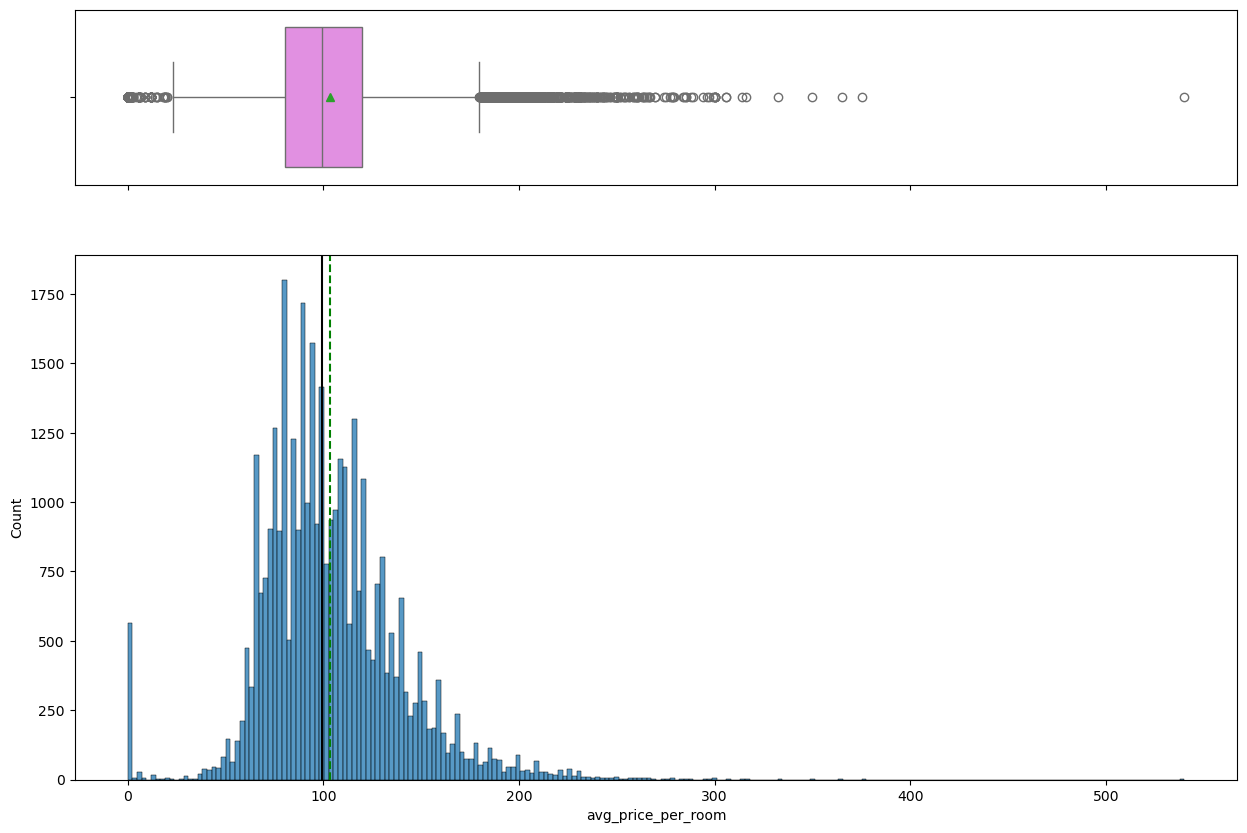

In [90]:
histogram_boxplot(df, "avg_price_per_room")

In [91]:
# We can see in out graph that even though the data seems to be accurate, there is one data point that is above 500 that clearly seems to be an outlyer
# We will assign this value to the higher whisker of the distribution
df["avg_price_per_room"] = assign_outliers_to_upper_whisker(
    df, "avg_price_per_room", upper_threshold=500
)

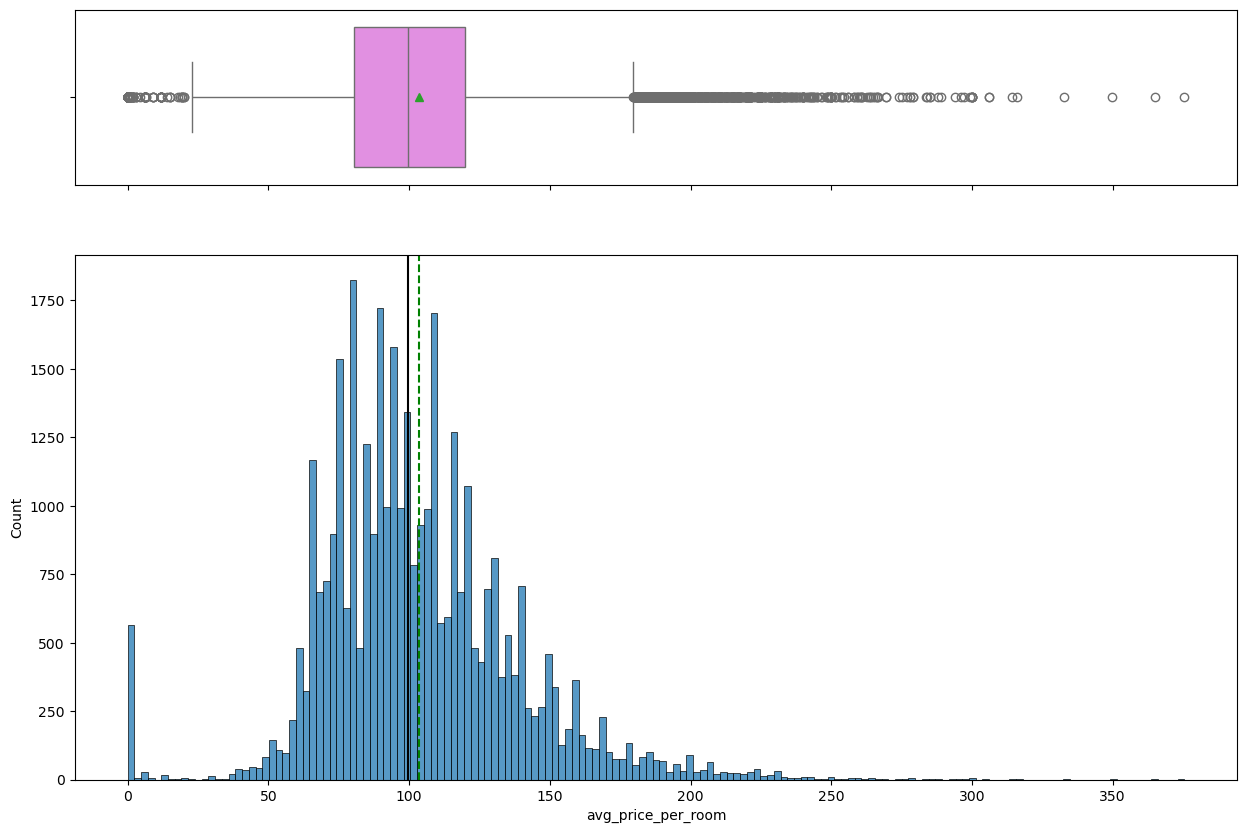

In [92]:
histogram_boxplot(df, "avg_price_per_room")

booking_status
Not_Canceled   67.23639
Canceled       32.76361
Name: proportion, dtype: float64

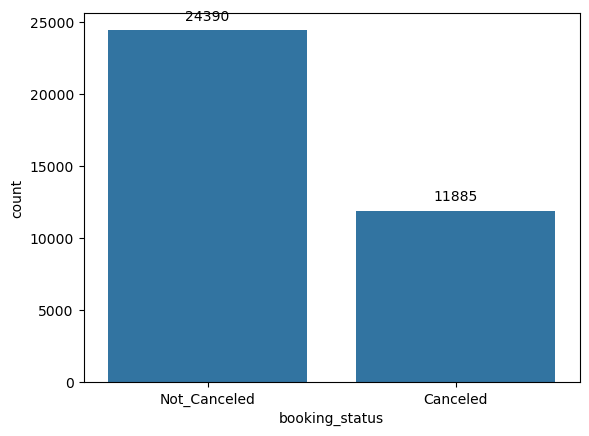

In [93]:
add_counts_to_countplot(sns.countplot(data=df, x="booking_status"))
df["booking_status"].value_counts(normalize=True) * 100

## Bivariate analysis

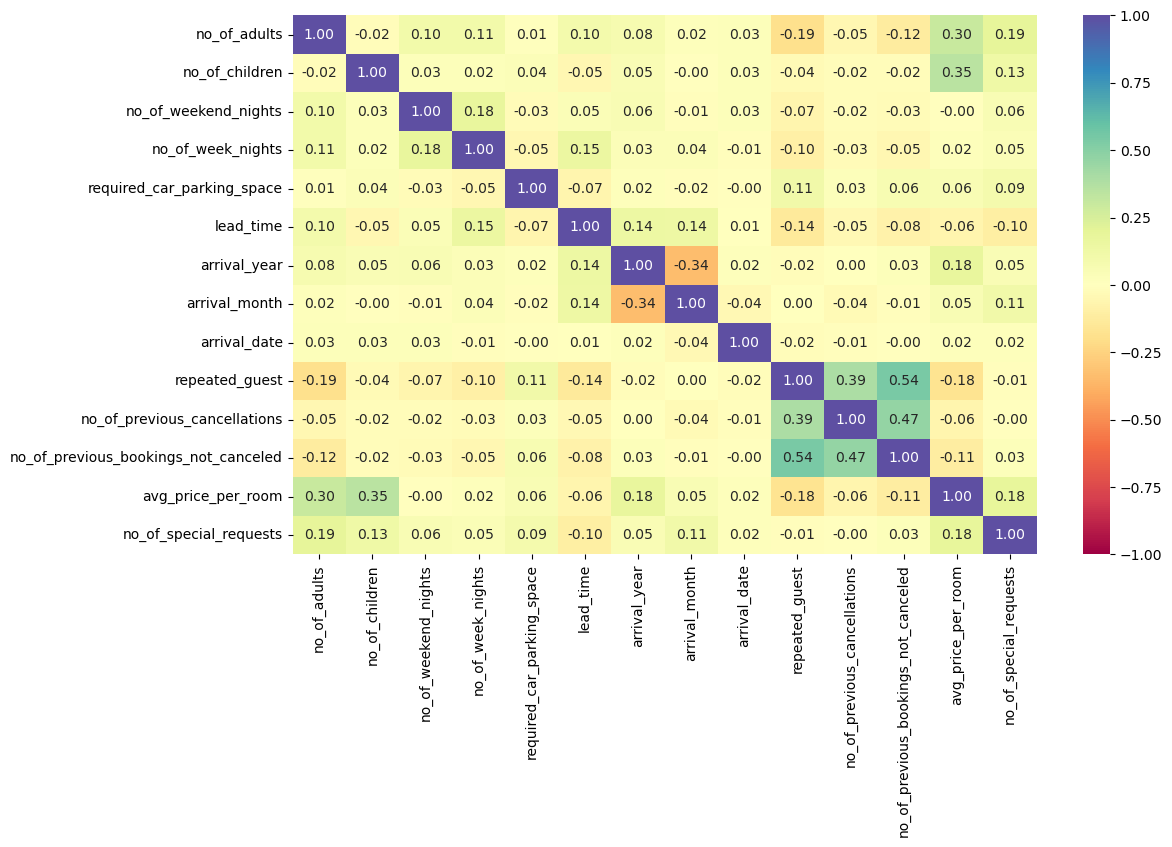

In [94]:
# Heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is no much apparent corelation between the variables, being the highest correlation between 'repeated_guest' and 'no_of_previous_bookings_not_cancelled', indicating that most of the time the clients that use the hotel again don't usually cancel their reservations. 

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

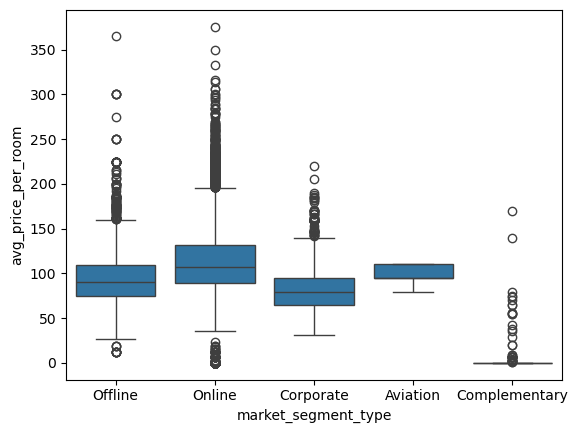

In [95]:
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room")

We can see here that the cancelled reservations account for 32% of the total reservations. Aroung 68% of the reservations are not cancelled.

In [96]:
# Creating a new dataframe to select only repeated guests.
df_rep = df[df["repeated_guest"] == 1]

booking_status
Not_Canceled   98.27957
Canceled        1.72043
Name: proportion, dtype: float64

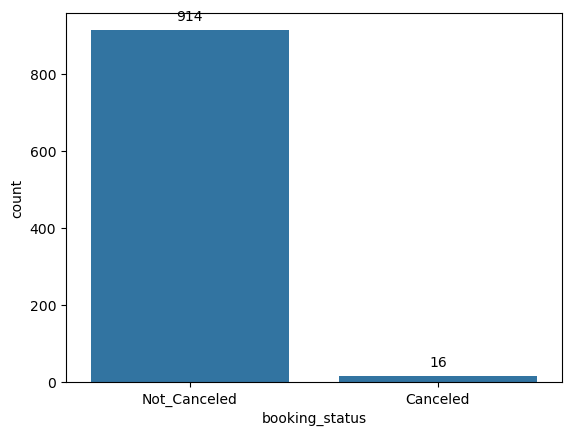

In [97]:
add_counts_to_countplot(sns.countplot(data=df_rep, x="booking_status"))
df_rep["booking_status"].value_counts(normalize=True) * 100

Repeated guests rarely cancel their reservations as commented before.

In [98]:
# New dataframes to check for the guests that have special requestes or not.
df_spe, df_no_spe = (
    df[df["no_of_special_requests"] >= 1],
    df[df["no_of_special_requests"] == 0],
)

booking_status
Not_Canceled   79.75512
Canceled       20.24488
Name: proportion, dtype: float64

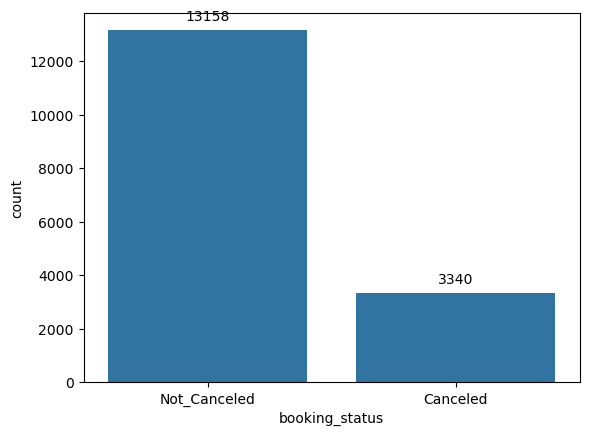

In [99]:
add_counts_to_countplot(sns.countplot(data=df_spe, x="booking_status"))
df_spe["booking_status"].value_counts(normalize=True) * 100

booking_status
Not_Canceled   56.79324
Canceled       43.20676
Name: proportion, dtype: float64

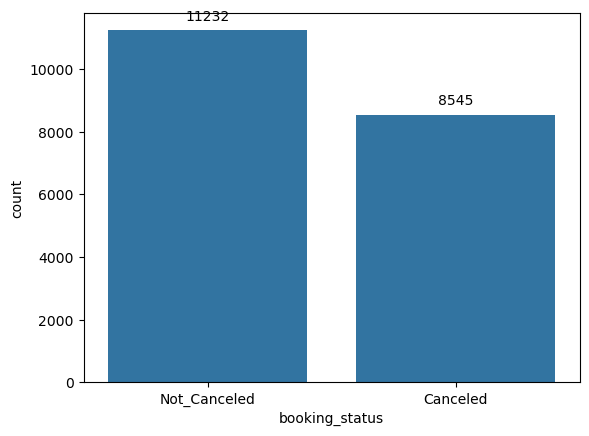

In [100]:
add_counts_to_countplot(sns.countplot(data=df_no_spe, x="booking_status"))
df_no_spe["booking_status"].value_counts(normalize=True) * 100

As we can see here, most of the time when a client has a special request, they do not cancel their reservations.

**Leading Questions**:
* What are the busiest months in the hotel?
   The busiest month is october whit more than 5300 guests.
* Which market segment do most of the guests come from?
   The majority of guests comes from the online segment (representing almost 64% of them)
* Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
   As expected, complementary prices are usually low or zero. Between the other segments, the average prices per room in the corportate segment is the cheapest, while the online segment is usually more expensive. Online segment has some outliers that are either cheap or expensive, even more than the offline segment. 
* What percentage of bookings are canceled?
   Around 33% of the reservations are cancelled. The other 67% are reservations are ot cancelled. 
* Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
    Only about 1.7% of the repeated guests cancel their reservations. 
* Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
    Whenever the guests had at least 1 special requirement it can be seen that the percentage of reversation cancellation decreases from 43% to about 20% (reversation not cancelled account for 56% and 79% respectively)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [101]:
# Before starting our data processing we need to hot encode our data. To do so we are going to assign the value 0 to non cancelled reservations and the value 1 to the cancelled ones.
df["booking_status"] = df["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

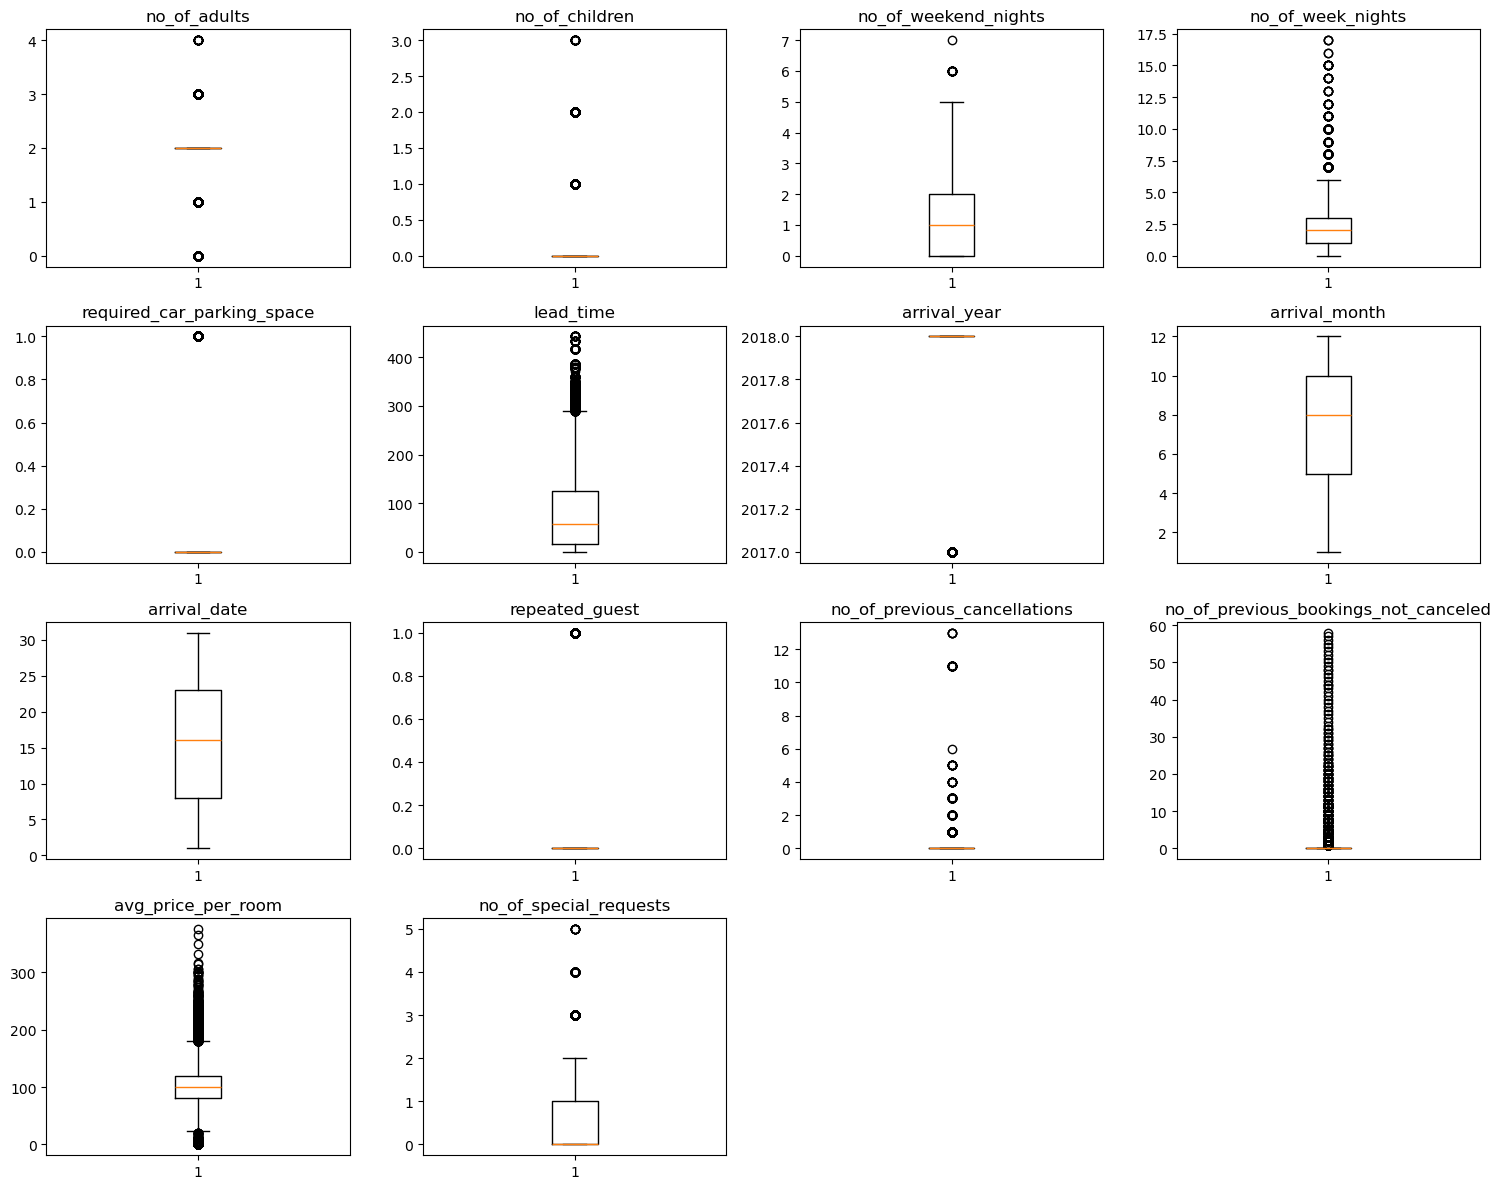

In [102]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("booking_status")
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Even though there is a lot of outlyers in out data, they seems to be normal values for each columns. As discussed before, the number of children was modified to avoid higher values like 9 or 10. 

## Logistic regression to predict which reservations are going to be cancelled.

* First, we are going to create a model that can predict which reservations are going to cancelled or not.
* For this porpuse we are going to create a logistic regression where we can predict the event based of the information that we have.
* As the hotel is mainly interested in decrease the losses related to cancelled reservation we will try maximize the model to avoid any kind of false positives and false negatives.
* False negatives (FN) refer to those reservations that are not predicted to be cancelled that end in a real cancellation
* False positives (FP) refer to those reservations that are predicted to be cancelled and that end not being cancelled.
* True positives (TP), and true negatives (TN) refer to reservations that are predicted to be either cancelled or not and at the end they stay like that.
* For these reasons is reasonable to think that the performance metric we will try to optimize is the F1-score which gives a an armonic average of recall and precision (avoiding FP and FN)

In [103]:
# Assigning out dependent and independent variables
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)
# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert all False and True values to 0 and 1
X_train = X_train.map(lambda x: 1 if x is True else (0 if x is False else x))

In [104]:
log_reg = sm.Logit(y_train, X_train.astype(float))
log_reg = log_reg.fit(disp=False)
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                  0.3292
Time:                        02:35:21   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

In [105]:
model_performance_classification_statsmodels(log_reg, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


As the preliminary model, we are getting relatively good values of accuracy, recall, precision and f1. We still need to chekc for regressions assumptions before getting our final model though. 

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [106]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [107]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


We can see that the only columns that has a high VIF value ar the dummie columns that we created, so no need for extra pocessing is required at this point. 

## Checking p-values

In [108]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [109]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

log_reg2 = sm.Logit(y_train, X_train1)
lreg2 = log_reg2.fit(disp=False)
print(lreg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                  0.3282
Time:                        02:35:27   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

After the processing the got rid of all the columns that had a p-value higher than 0.05 that statistically were not adding any value to our model.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [110]:
# converting coefficients to odds
odds = np.exp(lreg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lreg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


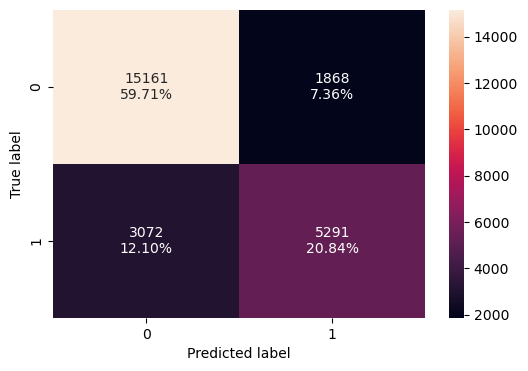

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(lreg2, X_train1, y_train)

In [112]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lreg2, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


As we can see the training performance has a good accuracy but our F1 (0.68) might be need some improvement,

## ROC-AUC

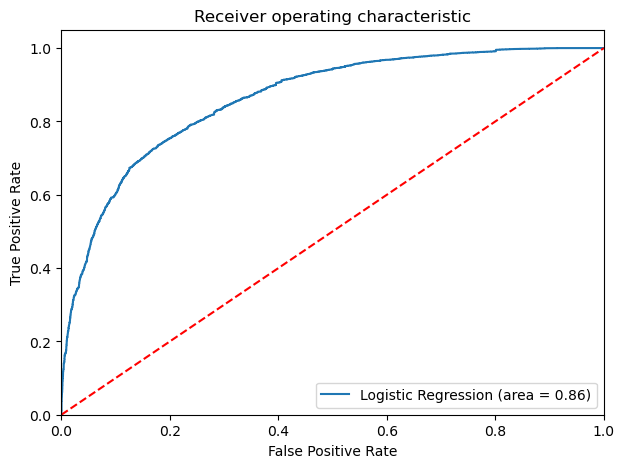

In [113]:
logit_roc_auc_train = roc_auc_score(y_train, lreg2.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lreg2.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [114]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lreg2.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708125


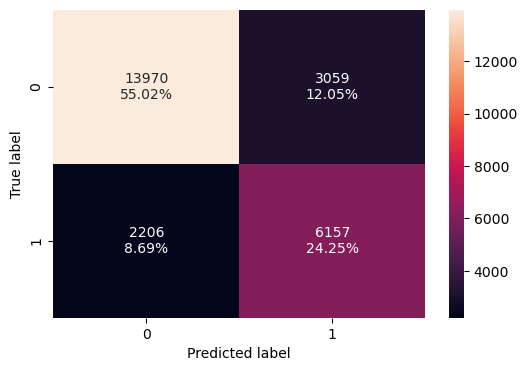

In [115]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lreg2, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [116]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lreg2, X_train1, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


Using this optimal threshold out F1 score got improved from 0.68 to 0.70, so for now is our best model

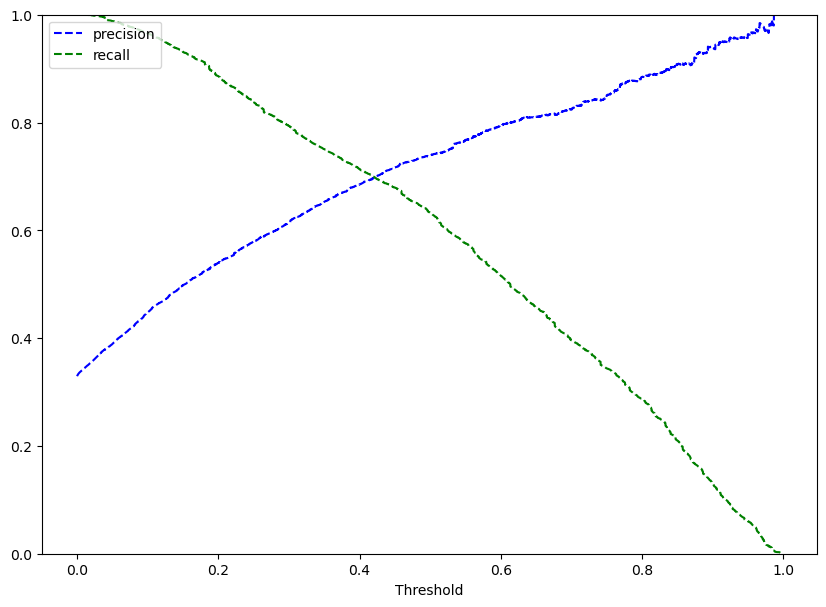

In [117]:
y_scores = lreg2.predict(X_train1)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [118]:
# Seems that the better threshold (where both lines cross in this case) is around 0.42
optimal_threshold_curve = 0.42

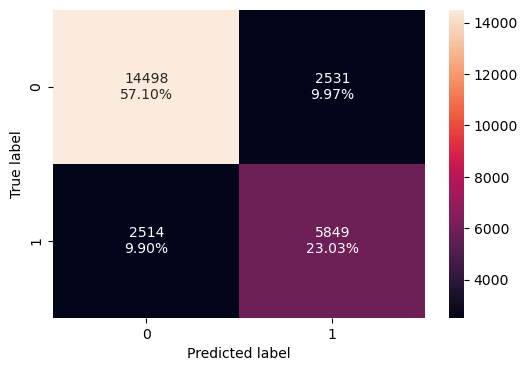

In [119]:
confusion_matrix_statsmodels(
    lreg2, X_train1, y_train, threshold=optimal_threshold_curve
)

In [120]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lreg2, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


On this new model out F1-score decreased but still higher that our original model

In [121]:
X_test1 = X_test[X_test1.columns].astype(float)

## Model performance evaluation

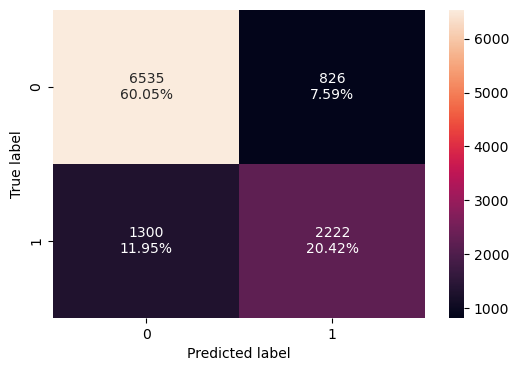

In [122]:
# creating confusion matrix
confusion_matrix_statsmodels(lreg2, X_test1, y_test)

In [123]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lreg2, X_test1, y_test
)  ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


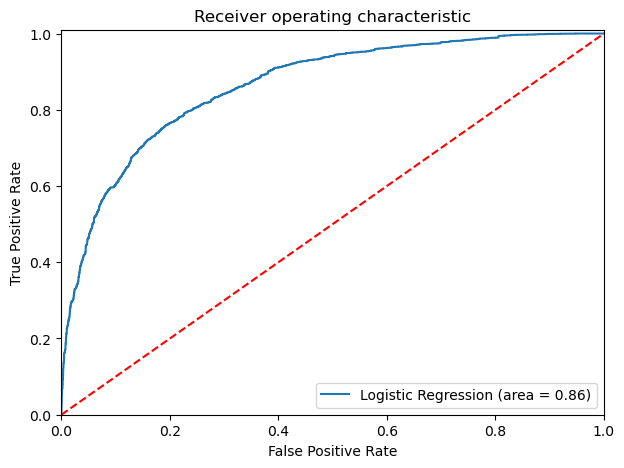

In [124]:
logit_roc_auc_train = roc_auc_score(y_test, lreg2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lreg2.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

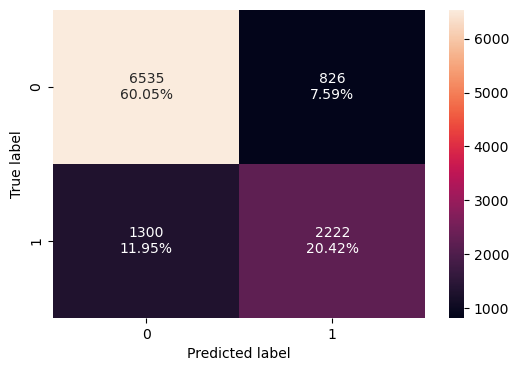

In [125]:
# creating confusion matrix
confusion_matrix_statsmodels(lreg2, X_test1, y_test)

In [126]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lreg2, X_test1, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


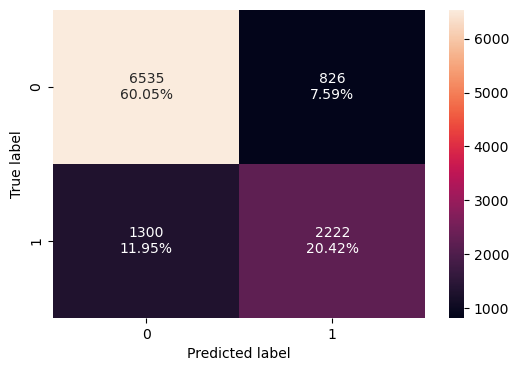

In [127]:
# creating confusion matrix
confusion_matrix_statsmodels(lreg2, X_test1, y_test)

In [128]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lreg2, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


## Final Model Summary

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [130]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


* As we can see here, our best model (considering the higster f1 score as the best performance measure) is the one that sets up a threshold of 0.37 . We can see pretty similar results on both test and training data. (F1-Score = 0.70)
* The 0.37 threshold incrases the recall and F1 while decreasing accuracy and precision. So we can expect some booking be flag as cancelled when they are not, but  the increase in the overall F1 should compensates this.
* The 0.42 threshold has a higher accuracy and precision, but lower F1 and recall compared to the 0.37 threshold. That means some more correct predictions but more false negatives.

## Building a Decision Tree model

In [131]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]
X = X.map(lambda x: 1 if x is True else (0 if x is False else x))
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [132]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


In [133]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

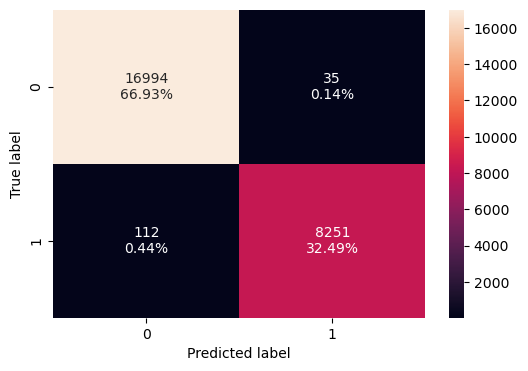

In [134]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [135]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


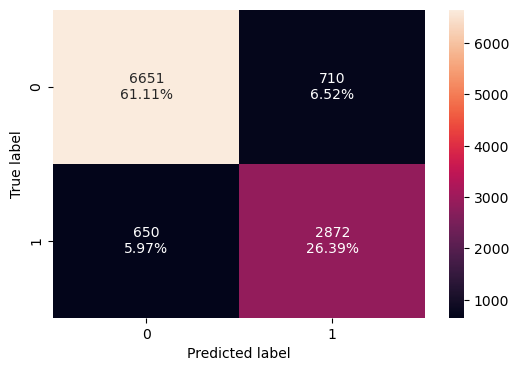

In [136]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [137]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87503,0.81545,0.80179,0.80856


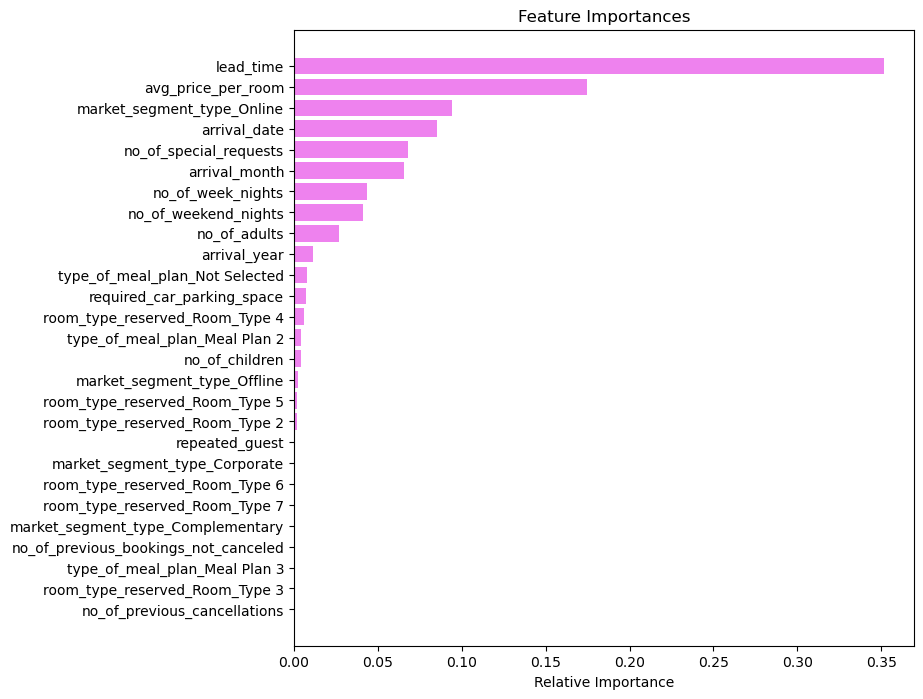

In [138]:
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to our decision tree the most important factor to predict cancellations are the lead time of the reservation and the average price per room.

## Do we need to prune the tree?

### Prepruning

We are going to use a grid search to find the optimal parameters to use in out clasifictation tree before letting the tree to fully grow. 

In [139]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

Per our grid search our decision tree much be pruned to a maximum depth of 6, max leaf nodes of 50, minimum samples spli of 10 and class weight balanced (as we have a disparity on the amount of cancelled and not cancelled reservations)

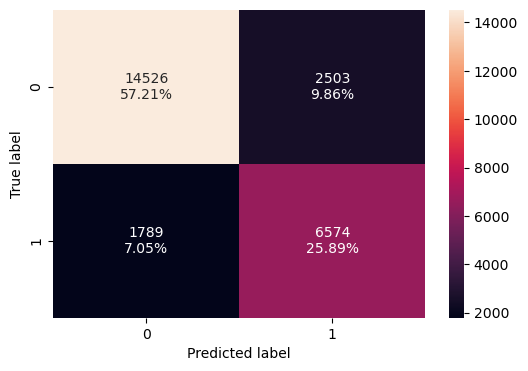

In [140]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [141]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


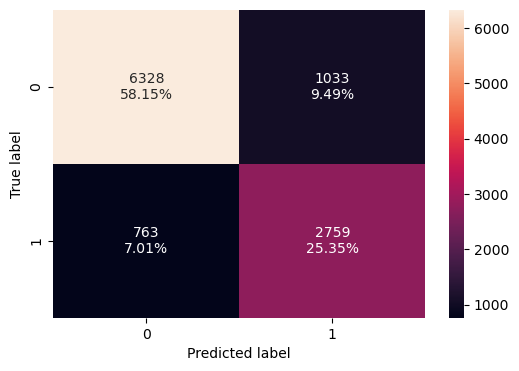

In [142]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [143]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


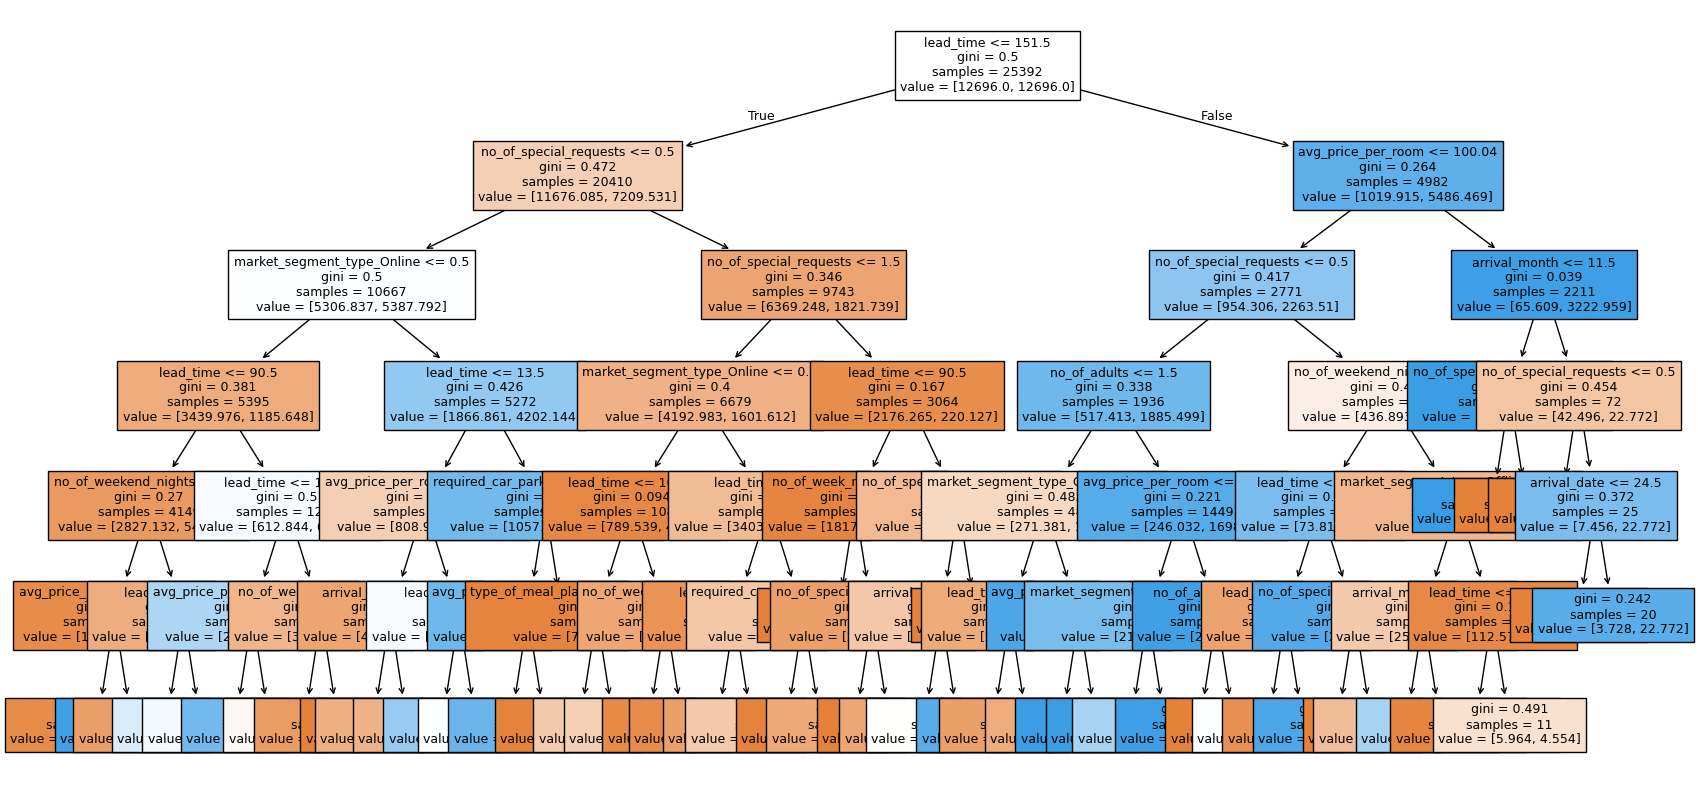

In [144]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [145]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

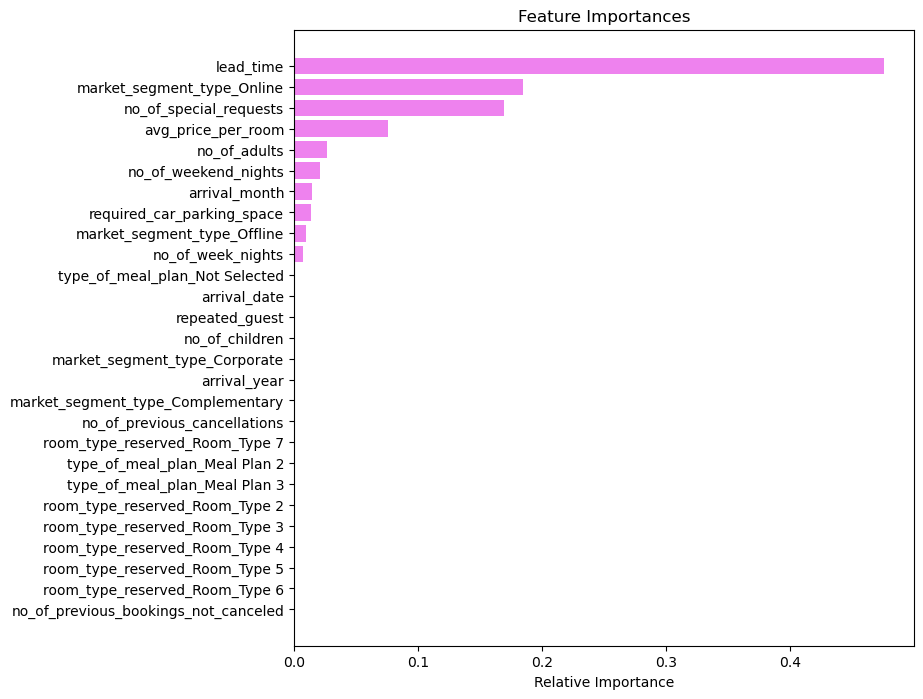

In [146]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

As we can see the lead time is still the most important predictor for cancellations. But this time is not the average price of the rooms the second most important predictor, this time is the market segment.

### Post-pruning

FOr our post-pruning proces we are going to use the ccp_alpha method, decreasing the amount of nodes by pruning them according to the ccp_alpha value (higher the value more nodes prunes)

In [147]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [148]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1841,0.00890,0.32806
1842,0.00980,0.33786
1843,0.01272,0.35058
1844,0.03412,0.41882


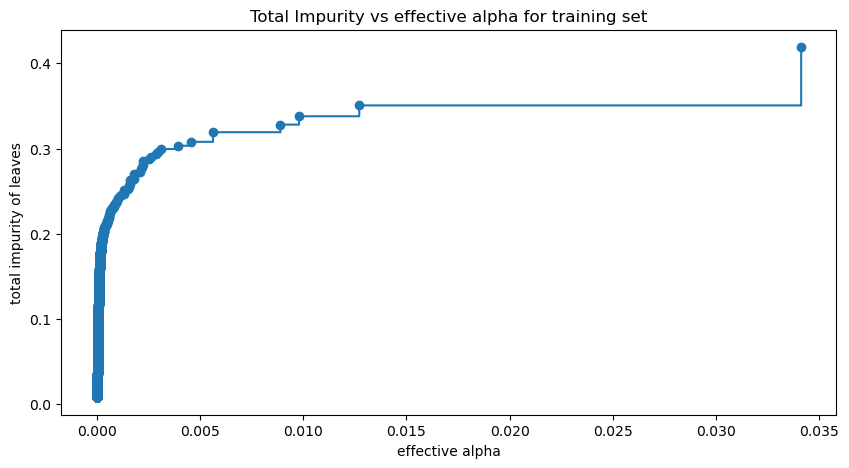

In [149]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

A ccp_alpha value of 0.081 leaves the tree with only 1 node. 

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Graph showing the decrease in the amount of nodes left in the tree after each pruning

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the post pruned decision tree the most important factor while predicting cancellation still are the leasd time and the market segment. A little behind are the average priceper room and the number of special requests

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

The best decision tree this time is the one that was post-prunned, which is giving the hightest F1 score of all. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* We presented two models that can help predict booking reservations.
* According to what was predicted by these models, some of the most important factors deciding whether a reservation is going to be canceled or not are the lead time, the average price of the room, the number of special requests, and the market segment.

* As we can deduce from the data, the lead time is one of the most important factors influencing cancellations. The longer the time between the reservation date and the actual stay, the higher the risk of cancellations.

* We can see from the data that most cancellations come from reservations made online compared to offline reservations. This might be due to the easier cancellation process for online reservations and the fact that many offline reservations are made through travel agencies as part of travel packages.

* Per our logistic regression, we also discovered that reservations that include parking have a much lower risk of being canceled.
* The number of special requests also decreases the risk of cancellations.
* Guests who are repeat customers of the hotel have a much lower risk of canceling.

Recommendations
*Based on our analysis, we can recommend the following to the hotel:

* Target Repeat Guests : For example, by providing loyalty programs. These guests seem to be less likely to cancel their reservations.
* Focus on Offline Channels : Offer better deals or discounts to offline reservation clients (e.g., travel agencies). Since cancellation rates for offline reservations are already lower than online ones, this could help reduce cancellations further. For the online segment, stricter cancellation policies and incentives might be effective in decreasing cancellations.
* Larger Groups : Larger groups (adults and children) seem to have a higher risk of cancellation. Setting deposits or stricter cancellation policies for such bookings could help reduce cancellations.
* Focus on Breakfast Packages : Guests who reserve with breakfast included tend to cancel less. Offering better rates or more appealing breakfast options to other customers might encourage them to choose this package.
* Room Types 3 and 7 : These rooms have the lowest cancellation rates. Investigating why these rooms are less likely to be canceled could provide insights into improving the appeal of other room types.
* Pricing Policy Review : As the price of rooms increases, the chances of cancellation also increase. A review of pricing strategies might be necessary to address this issue.
